# Process mining and causal discovery example

In [1]:
import sys
import os
# Get the current directory (where the notebook is located)
notebook_dir = os.getcwd()
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir))
# Get two directories up
two_dirs_up = os.path.abspath(os.path.join(parent_dir, os.pardir))
# Add the project directory to the Python path
sys.path.append(two_dirs_up)

In [2]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
import sax
from sax.process_data.formatters.xes_formatter import XESFormatter
from sax.process_data.formatters.csv_formatter import CSVFormatter
from sax.utils.constants import Constants
from lingam.utils import make_dot
from sax.process_data.tabular_data import TabularEventData
from pm4py.objects.conversion.log import converter as log_converter
import sax.process_mining.process_mining as pm

In [4]:


fileName = "C:\Data\Automation\SAX\Data\collider expirementation\collider non-overlapping runs U[5,7], U[9,11]\simulated_run_non_overlapping_gen.csv"
dataframe = pm.import_csv(fileName,timestamp_format="%Y-%m-%d %H:%M:%S.%f")


In [5]:
dataframe.getData()

,Id,Source,Type,Timestamp,Resource,Role
0,2182,EVENT 1 START,assign,2023-02-24 12:02:25.523000+00:00,Owner2,Administrator
1,2182,EVENT 1 START,start,2023-02-24 12:02:25.523000+00:00,Owner2,Lawyer
2,2182,EVENT 1 START,complete,2023-02-24 12:02:25.523000+00:00,Owner1,Administrator
3,2182,Email,assign,2023-02-24 12:02:25.523000+00:00,Owner3,Lawyer
4,2182,Archive,assign,2023-02-24 12:02:25.523000+00:00,Owner1,Technician
...,...,...,...,...,...,...
149980,686,Close Application,start,2023-02-03 10:57:38.527000+00:00,Owner3,Administrator
149981,686,Close Application,complete,2023-02-03 10:57:44.397227+00:00,Owner3,Administrator
149982,686,EVENT 7 END,assign,2023-02-03 10:57:44.397227+00:00,Owner3,Lawyer
149983,686,EVENT 7 END,start,2023-02-03 10:57:44.397227+00:00,Owner3,Lawyer


In [6]:
print('Mandatory Properties of the parsed event log: \n',dataframe.getMandatoryProperties())
print('Optional properties of the parsed event log: \n',dataframe.getOptionalProperties())


Mandatory Properties of the parsed event log: 
 {'case:concept:name': 'Id', 'concept:name': 'Source', 'time:timestamp': 'Timestamp', 'lifecycle:transition': 'Type'}
Optional properties of the parsed event log: 
 {'Resource': 'Resource', 'Role': 'Role'}


In [7]:

event_log = dataframe.filterLifecycleEvents(['complete'])
print(event_log)


Data:           Id             Source      Type                        Timestamp  \
2       2182      EVENT 1 START  complete 2023-02-24 12:02:25.523000+00:00   
7       2182              Email  complete 2023-02-24 12:02:32.268000+00:00   
8       2182            Archive  complete 2023-02-24 12:02:36.506000+00:00   
11      2182  Close Application  complete 2023-02-24 12:02:43.253164+00:00   
14      2182        EVENT 7 END  complete 2023-02-24 12:02:43.253164+00:00   
...      ...                ...       ...                              ...   
149972   686      EVENT 1 START  complete 2023-02-03 10:57:28.275000+00:00   
149977   686              Email  complete 2023-02-03 10:57:34.142000+00:00   
149978   686            Archive  complete 2023-02-03 10:57:38.527000+00:00   
149981   686  Close Application  complete 2023-02-03 10:57:44.397227+00:00   
149984   686        EVENT 7 END  complete 2023-02-03 10:57:44.397227+00:00   

       Resource           Role  
2        Owner1  Adminis

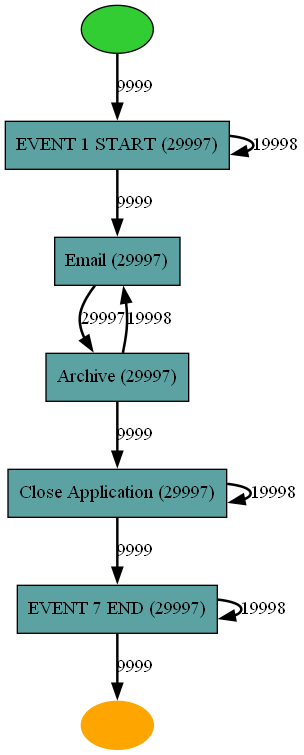

In [8]:
import sax.process_mining.process_mining as pm
net = pm.discover_heuristics_net(dataframe)
pm.view_heuristics_net(net)


In [9]:
#transform the RawEventData to tabular representation
transposed_df = dataframe.transposeToTabular()
transposed_df.getData()

,Id,EVENT 1 START,EVENT 1 START__Resource,EVENT 1 START__Role,Email,Email__Resource,Email__Role,Archive,Archive__Resource,Archive__Role,Close Application,Close Application__Resource,Close Application__Role,EVENT 7 END,EVENT 7 END__Resource,EVENT 7 END__Role
0,0,2023-01-25 09:00:00+00:00,Owner3,Lawyer,2023-01-25 09:00:06.406000+00:00,Owner2,Administrator,2023-01-25 09:00:10.743000+00:00,Owner3,Administrator,2023-01-25 09:00:17.152773+00:00,Owner2,Lawyer,2023-01-25 09:00:17.152773+00:00,Owner3,Administrator
1,1,2023-01-25 09:01:12.348000+00:00,Owner2,Lawyer,2023-01-25 09:01:18.959000+00:00,Owner3,Lawyer,2023-01-25 09:01:21.402000+00:00,Owner1,Administrator,2023-01-25 09:01:28.016404+00:00,Owner3,Administrator,2023-01-25 09:01:28.016404+00:00,Owner3,Administrator
2,2,2023-01-25 09:07:17+00:00,Owner1,Lawyer,2023-01-25 09:07:22.413000+00:00,Owner2,Technician,2023-01-25 09:07:27.131000+00:00,Owner2,Administrator,2023-01-25 09:07:32.547069+00:00,Owner2,Lawyer,2023-01-25 09:07:32.547069+00:00,Owner3,Technician
3,3,2023-01-25 09:10:59.356000+00:00,Owner1,Administrator,2023-01-25 09:11:05.842000+00:00,Owner2,Lawyer,2023-01-25 09:11:10.304000+00:00,Owner3,Technician,2023-01-25 09:11:16.793951+00:00,Owner3,Lawyer,2023-01-25 09:11:16.793951+00:00,Owner2,Technician
4,4,2023-01-25 09:12:49.247000+00:00,Owner2,Technician,2023-01-25 09:12:55.875000+00:00,Owner1,Lawyer,2023-01-25 09:12:59.781000+00:00,Owner3,Lawyer,2023-01-25 09:13:06.411520+00:00,Owner1,Administrator,2023-01-25 09:13:06.411520+00:00,Owner3,Technician
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,2023-06-19 12:25:33.362000+00:00,Owner2,Administrator,2023-06-19 12:25:40.188000+00:00,Owner2,Technician,2023-06-19 12:25:43.787000+00:00,Owner2,Lawyer,2023-06-19 12:25:50.615538+00:00,Owner1,Lawyer,2023-06-19 12:25:50.615538+00:00,Owner2,Technician
9995,9995,2023-06-19 12:25:55.764000+00:00,Owner2,Administrator,2023-06-19 12:26:02.064000+00:00,Owner1,Administrator,2023-06-19 12:26:05.662000+00:00,Owner3,Administrator,2023-06-19 12:26:11.965755+00:00,Owner1,Administrator,2023-06-19 12:26:11.965755+00:00,Owner2,Lawyer
9996,9996,2023-06-19 12:27:15.155000+00:00,Owner1,Technician,2023-06-19 12:27:20.729000+00:00,Owner2,Lawyer,2023-06-19 12:27:25.548000+00:00,Owner1,Technician,2023-06-19 12:27:31.124483+00:00,Owner1,Lawyer,2023-06-19 12:27:31.124483+00:00,Owner3,Technician
9997,9997,2023-06-19 12:30:28.224000+00:00,Owner3,Lawyer,2023-06-19 12:30:33.960000+00:00,Owner3,Technician,2023-06-19 12:30:38.557000+00:00,Owner2,Lawyer,2023-06-19 12:30:44.296887+00:00,Owner3,Lawyer,2023-06-19 12:30:44.296887+00:00,Owner1,Lawyer


In [10]:
activity_attr= transposed_df.getActivityAttributesData('Email')
print(activity_attr)

     Email__Resource    Email__Role
0             Owner2  Administrator
1             Owner3         Lawyer
2             Owner2     Technician
3             Owner2         Lawyer
4             Owner1         Lawyer
...              ...            ...
9994          Owner2     Technician
9995          Owner1  Administrator
9996          Owner2         Lawyer
9997          Owner3     Technician
9998          Owner2         Lawyer

[9999 rows x 2 columns]


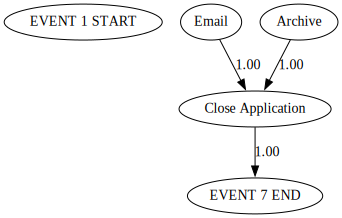

In [11]:
import sax.causal_process_discovery.causal_discovery as cd
result = cd.discover_causal_dependencies(dataframe)
cd.view_causal_dependencies(result)
